# Travel Package Purchase Prediction

**Background and Context**

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.

**Objective**

To predict which customer is more likely to purchase the newly introduced travel package.


**Data Dictionary**

1. CustomerID: Unique customer ID
1. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
2. Age: Age of customer
3. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
4. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
5. Occupation: Occupation of customer
6. Gender: Gender of customer
7. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
8. PreferredPropertyStar: Preferred hotel property rating by customer
9. MaritalStatus: Marital status of customer
10. NumberOfTrips: Average number of trips in a year by customer
11. Passport: The customer has a passport or not (0: No, 1: Yes)
12. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
13. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
14. Designation: Designation of the customer in the current organization
15. MonthlyIncome: Gross monthly income of the customer

**Customer interaction data: **
1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Import Libraries

In [69]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import tree
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

**We will use the same `credit data` used in decision tree hands-on lecture.**

In [72]:
url = "/content/Tourism dataset.xlsx"
traveldata = pd.read_excel(url)

traveldata.head(10) #several missing values!

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [73]:
traveldata.shape

(4888, 20)

There are 4888 records and 20 variables in the dataset

In [74]:
# creating a copy of the data to avoid any changes to original data
data = traveldata.copy()

In [75]:
# checking of there are any duplicates in the dataset
data[data.duplicated()].count()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

- There are no duplicate values in the data.

In [76]:
# variable of interest
data['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

Among the clients reached by the company, only 920 responded while 3968 did not respond

In [77]:
data.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

* Dependent variable is the ProdTaken, which if of *int* type.
* *TypeofContact*, *Occupation*, *Gender*, *ProductPitched*, *MaritalStatus* and *Designation*are of *object* type.
* *CustomerID*, *ProdTaken*, *CustomerID*, *NumberOfPersonVisiting*, *Passport*, *PitchSatisfactionScore*, *OwnCar*, column is of *int* type.
* All other columns are float in nature.

In [78]:
data.drop(["CustomerID"], axis=1, inplace=True)

In [79]:
data.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

* Age, TypeofContact,DurationofPitch,Numberoffollowups,Preferredpropertystar,NumerofTrips,Numberofchildrenvisiting and MonthlyIncome columns have missing values

In [80]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


* Youngest Customer was 18yrs old, with 50% of the clientsaging than or equal to 37yrs old 

* Duration of pitch is skewed to the right, shows there are outliers in the dataset, with 75% of the pitch taking less than 21 minutes. 

* In regards to the number of trips made, 75% of the customers made less than 5 trips with the maximum number of trips being 20.


In [81]:
data.describe(include=["object", "bool"])

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


Lets convert the columns with an 'object' datatype into categorical variables

In [82]:
cat_columns = ["TypeofContact", "Occupation", "Gender", "ProductPitched", "MaritalStatus", "Designation" ]
for i in cat_columns: 
    print(data[i].value_counts())
    print("*" * 50)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
**************************************************


The Gender variable has three values; Male, Female and Fe Male. This is a data entry error and we will corrct it

**Gender - Replacing Fe Male to Female**

In [83]:
data['Gender'] = data['Gender'].str.replace('Fe Male','Female')

In [84]:
cat_columns = ["TypeofContact", "Occupation", "Gender", "ProductPitched", "MaritalStatus", "Designation" ]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Male      2916
Female    1972
Name: Gender, dtype: int64
**************************************************
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
**************************************************


The Gender variable now has two genders; Female and Male

# **EDA**

## Univariate analysis

In [85]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [86]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on OwnCar

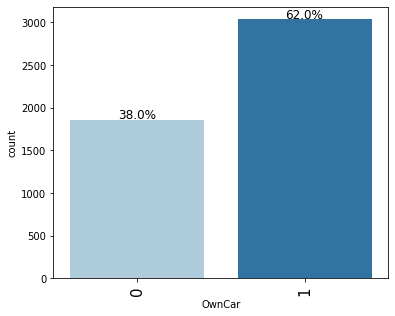

In [87]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "OwnCar", perc=True, n=5)

* 62% of the customers own cars.

### Observations on TypeofContact

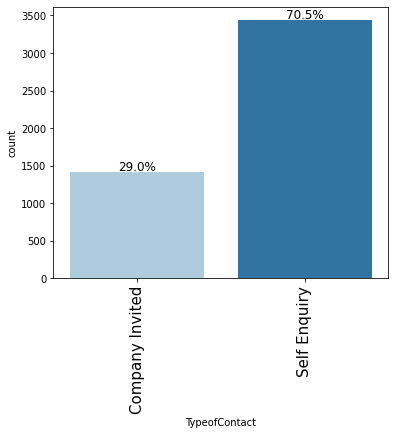

In [88]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "TypeofContact", perc=True, n=5)

* 70% of the customers made inquiries on their own

### Observations on CityTier

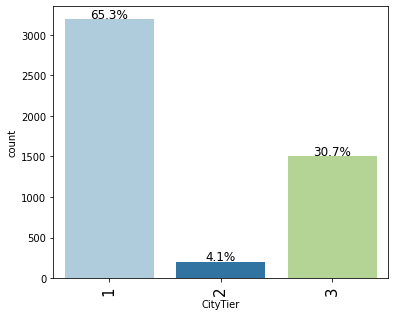

In [89]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "CityTier", perc=True, n=5)

* 65% of the customers come from Tier 1 Cities with the least (4%) coming from Tier 2

### Observations on Duration of Pitch

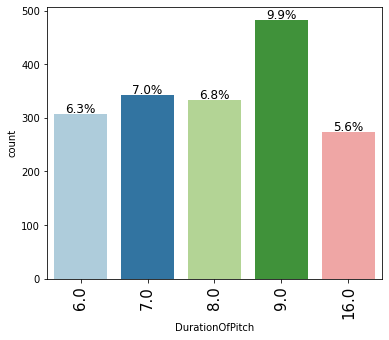

In [90]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "DurationOfPitch", perc=True, n=5)

* Among the clients who received a pitch, approximately 10% took 9 minutes and the least 5.6% Taking 16 minutes 

### Observations on Occupation

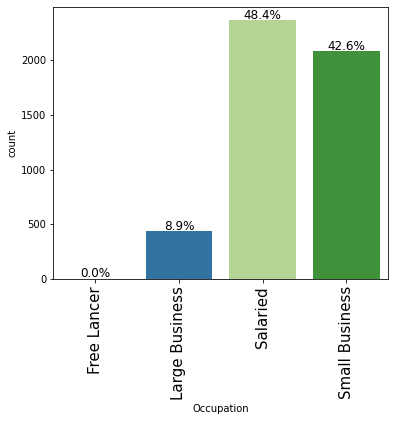

In [91]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "Occupation", perc=True, n=5)

* Majority of the customers are either Salried or in Small Businesses

### Observations on Gender

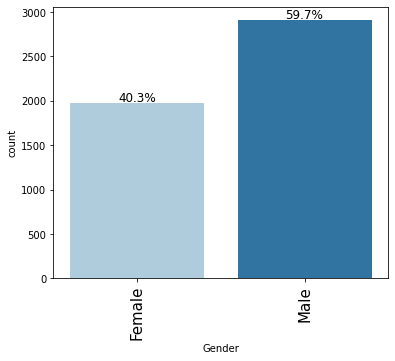

In [92]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "Gender", perc=True, n=5)

* Majority of the customers are Male 59% 

### Observations on NumberOfPersonVisiting    

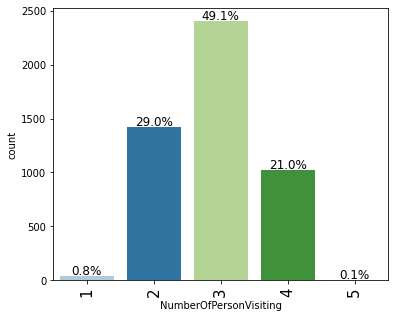

In [93]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "NumberOfPersonVisiting", perc=True, n=5)

* Among the customers, 49% planned to visit as 3 persons with the least being those traveling alone or in a company of 5 persons.

### Observations on NumberOfFollowups     

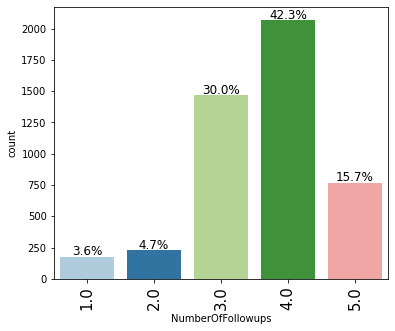

In [94]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "NumberOfFollowups", perc=True, n=5)

* 42% of the customers received 4 follow ups, 30% received 3 follow ups while those that received the highest number of follow-ups being 5, of whom they were 15.7%. 

### Observations on ProductPitched     

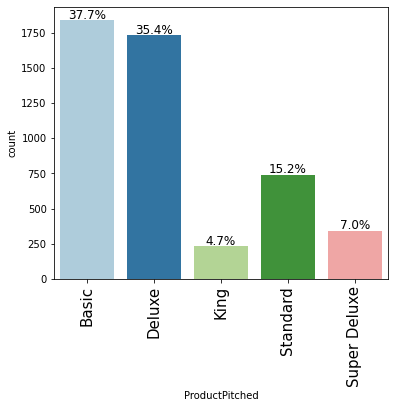

In [95]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "ProductPitched", perc=True, n=5)

* Among the clients who received a pitch, approximately 10% took 9 minutes and the least 5.6% Taking 16 minutes 

### Observations on PreferredPropertyStar     

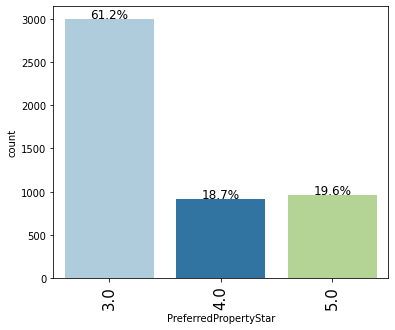

In [96]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "PreferredPropertyStar", perc=True, n=5)

* Among the clients who received a pitch, approximately 10% took 9 minutes and the least 5.6% Taking 16 minutes 

### Observations on MaritalStatus     

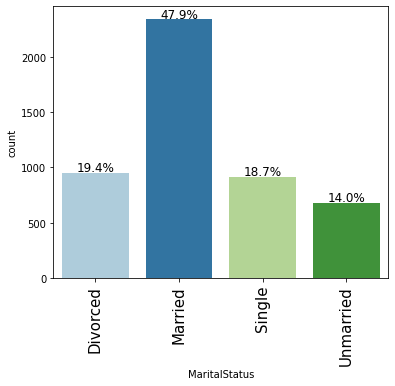

In [97]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "MaritalStatus", perc=True, n=5)

* Among the clients who received a pitch, approximately 10% took 9 minutes and the least 5.6% Taking 16 minutes 

### Observations on NumberOfTrips     

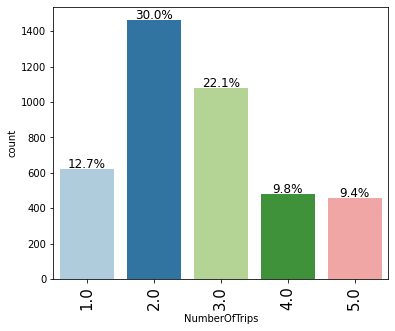

In [98]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "NumberOfTrips", perc=True, n=5)

* Among the clients who received a pitch, approximately 10% took 9 minutes and the least 5.6% Taking 16 minutes 

### Observations on Passport     

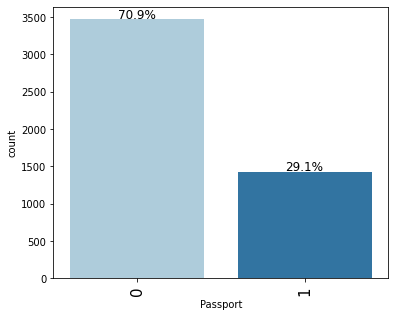

In [99]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "Passport", perc=True, n=5)

* Among the clients who received a pitch, approximately 10% took 9 minutes and the least 5.6% Taking 16 minutes 

### Observations on PitchSatisfactionScore     

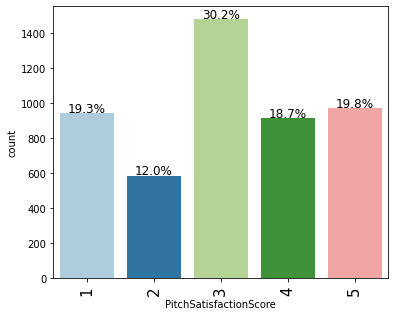

In [100]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "PitchSatisfactionScore", perc=True)

* Among the clients who received a pitch, approximately 10% took 9 minutes and the least 5.6% Taking 16 minutes 

### Observations on NumberOfChildrenVisiting     

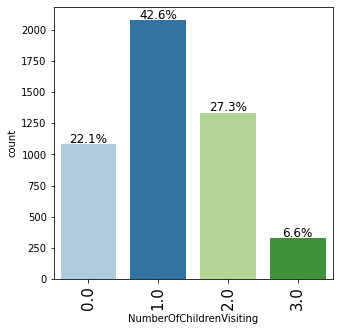

In [101]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "NumberOfChildrenVisiting", perc=True)

* Among the clients who received a pitch, approximately 10% took 9 minutes and the least 5.6% Taking 16 minutes 

### Observations on Designation     

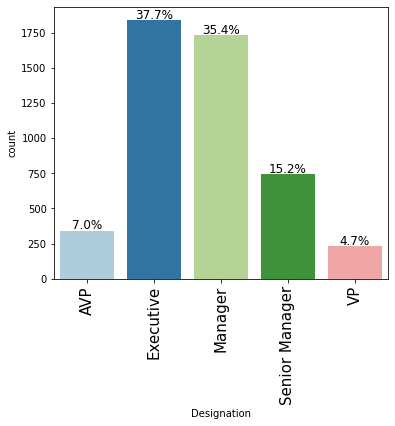

In [102]:
# limiting to only top 5 ocuurences
labeled_barplot(data, "Designation", perc=True)

* Among the clients who received a pitch, approximately 10% took 9 minutes and the least 5.6% Taking 16 minutes 

### Observations on Age

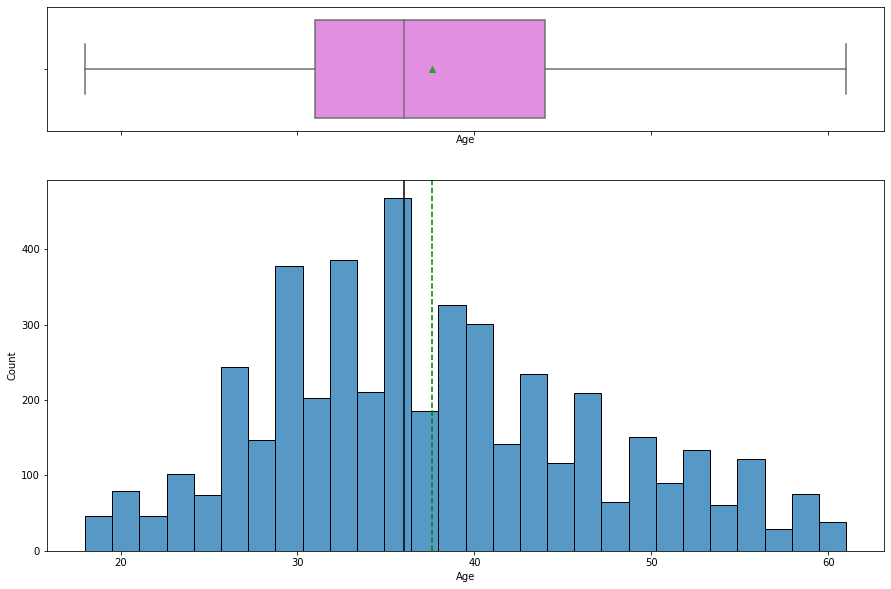

In [103]:
histogram_boxplot(data, "Age")

* The distribution of Age is normaly distributed, there are no outliers in this variable

### Observations on Monthly Income

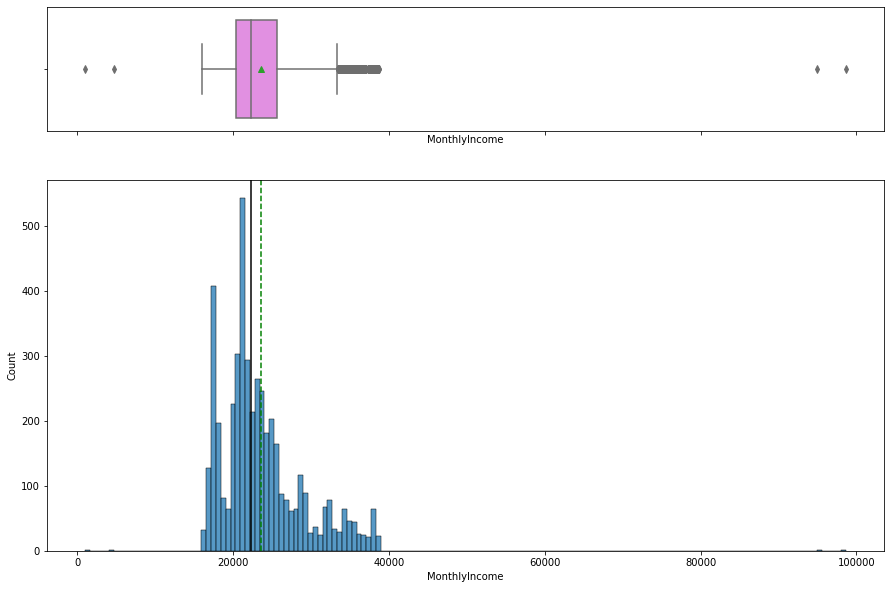

In [104]:
histogram_boxplot(data, "MonthlyIncome")

The distribution of Monthly income is slightly rightly skewed, with outliers as shown in the boxplot

# Bi-variate Analysis

**We will not consider the *tag* columns for correlation check as they have only 0 or 1 values.**

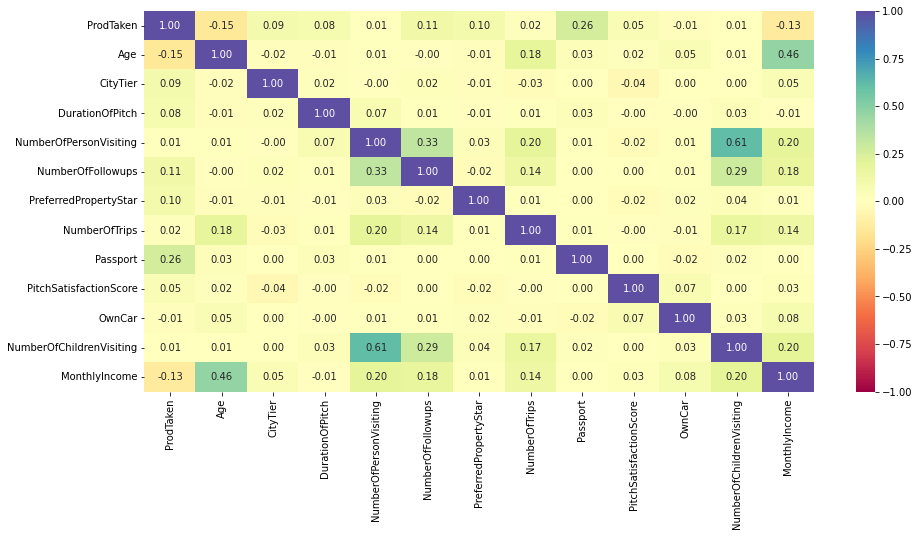

In [105]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* *Number of persons visiting* and *number of children* columns are highly correlated.
* *Age* and *Monthly incomes* columns are slighly correlated.

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


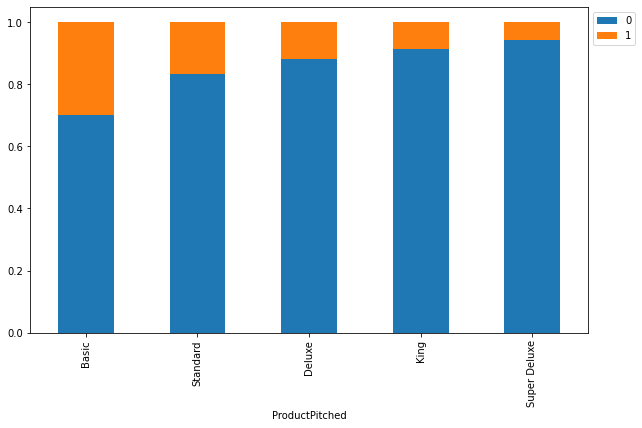

In [ ]:
stacked_barplot(data, "ProductPitched", "ProdTaken")

* Most customers that accepted to take the package were those for basic, followed by the those that wanted the standard package. Notably, the Super delax package wasnt picked by majority. 

Gender          Female  Male   All
ProductPitched                    
All               1972  2916  4888
Deluxe             724  1008  1732
Basic              680  1162  1842
Standard           326   416   742
Super Deluxe       160   182   342
King                82   148   230
------------------------------------------------------------------------------------------------------------------------


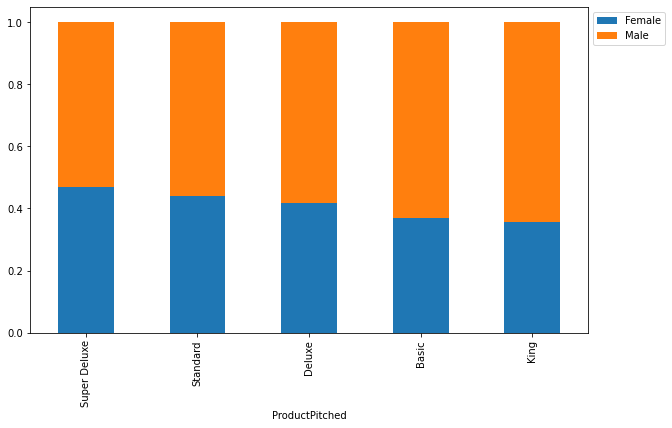

In [ ]:
stacked_barplot(data, "ProductPitched", 'Gender')

* Those using Super Deluxe were approximately half of the Male and half of the Female. 
* King size package was taken by most Male. Female form majority of the clients that used the different packages.  

TypeofContact   Company Invited  Self Enquiry   All
ProductPitched                                     
All                        1419          3444  4863
Deluxe                      541          1176  1717
Basic                       516          1316  1832
Standard                    218           524   742
Super Deluxe                 96           246   342
King                         48           182   230
------------------------------------------------------------------------------------------------------------------------


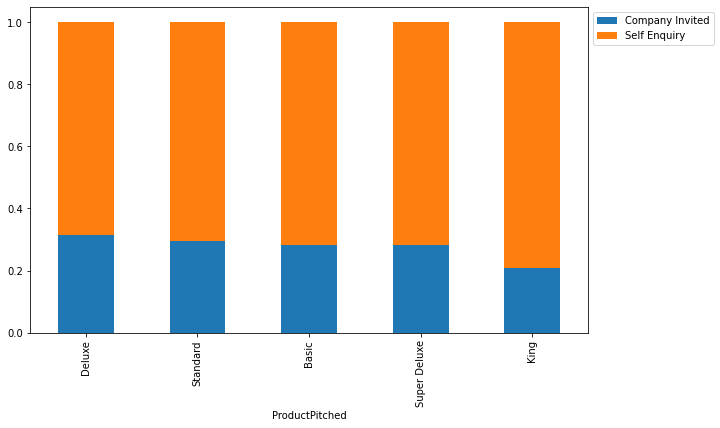

In [ ]:
stacked_barplot(data, "ProductPitched", 'TypeofContact')

* Most of the self inquiry clients chose the King package, while among those that the company invited took the Deluxe package. 

CityTier           1    2     3   All
ProductPitched                       
All             3190  198  1500  4888
Basic           1466  108   268  1842
Deluxe           908   40   784  1732
King             168   22    40   230
Standard         436   18   288   742
Super Deluxe     212   10   120   342
------------------------------------------------------------------------------------------------------------------------


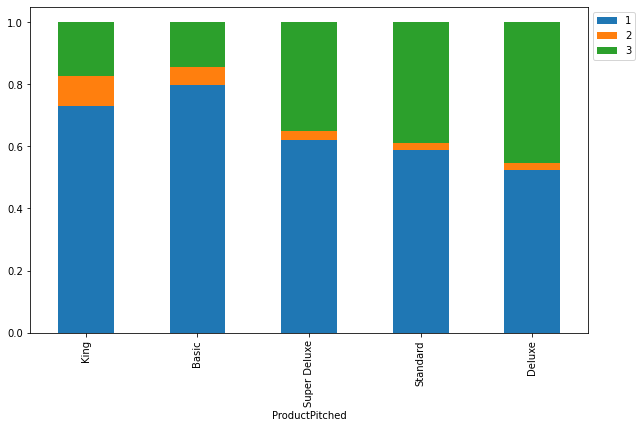

In [ ]:
stacked_barplot(data, "ProductPitched", "CityTier")

* Most clients from City Tier 1 took the Basic package, followed by those that chose the King package. Among the Tier 2 city clients, most chose the King package, while the Tier 3 city clients chose the Deluxe package followed closely by thse that chose Standard and Super deluxe

Occupation      Free Lancer  Large Business  Salaried  Small Business   All
ProductPitched                                                             
Basic                     2             196       924             720  1842
All                       2             434      2368            2084  4888
Deluxe                    0             124       818             790  1732
King                      0              12       114             104   230
Standard                  0              84       338             320   742
Super Deluxe              0              18       174             150   342
------------------------------------------------------------------------------------------------------------------------


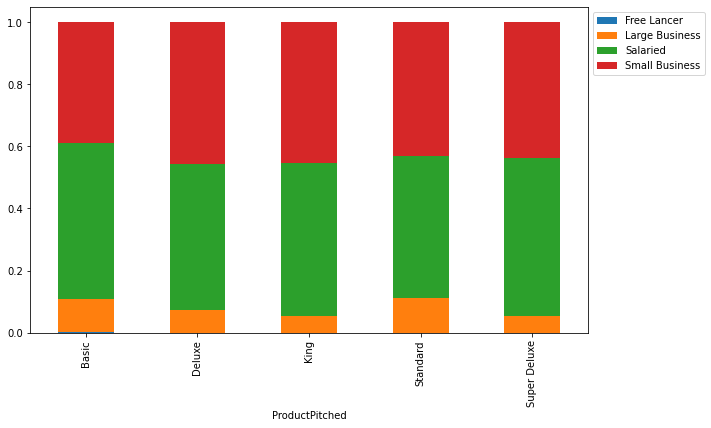

In [ ]:
stacked_barplot(data, "ProductPitched", "Occupation")

* Overall, the small business clients were averagely distributed with slighly less taking the basic package.
* Majority of those that chose basic and Super deluxe packages were the Salaried.
* Among the Large business clients, majority chose the standard package followed closely by those that chose basic and deluxe packages. 

# **Data Pre-Processing**

## Dealing with missing values

In [106]:
# nans are floats so they become strings here
# we also need this to be strings because we're adding a category that's not present
data['TypeofContact'] = data['TypeofContact'].astype(str).replace('nan', 'is_missing').astype('category')
data['TypeofContact'].isnull().sum()

0

In [107]:
# now using `fillna` with a numeric column
print(data['DurationOfPitch'].isnull().sum())
data['DurationOfPitch'].fillna(data['DurationOfPitch'].mean(), inplace=True)  # mean imputation
data['DurationOfPitch'].isnull().sum()

251


0

In [108]:
# now using `fillna` with a numeric column
print(data['NumberOfFollowups'].isnull().sum())
data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].mean(), inplace=True)  # mean imputation
data['NumberOfFollowups'].isnull().sum()

45


0

In [109]:
# now using `fillna` with a numeric column
print(data['PreferredPropertyStar'].isnull().sum())
data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].mean(), inplace=True)  # mode imputation
data['PreferredPropertyStar'].isnull().sum()

26


0

In [110]:
# now using `fillna` with a numeric column
print(data['NumberOfTrips'].isnull().sum())
data['NumberOfTrips'].fillna(data['NumberOfTrips'].mean(), inplace=True)  # mode imputation
data['NumberOfTrips'].isnull().sum()

140


0

In [111]:
# now using `fillna` with a numeric column
print(data['NumberOfChildrenVisiting'].isnull().sum())
data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].mean(), inplace=True)  # mode imputation
data['NumberOfChildrenVisiting'].isnull().sum()

66


0

In [112]:
print(data['MonthlyIncome'].isnull().sum())
data['MonthlyIncome'].fillna(data['MonthlyIncome'].mean(), inplace=True)  # mode imputation
data['MonthlyIncome'].isnull().sum()

233


0

In [113]:
# now using `fillna` with a numeric column
print(data['Age'].isnull().sum())
data['Age'].fillna(data['Age'].mean(), inplace=True)  # mean imputation
data['Age'].isnull().sum()

226


0

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   object  
 6   Gender                    4888 non-null   object  
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   object  
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   object  
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   int64 

* There are no null values in teh variables as missing or nan have been imputed

**Changing the variable datatypes**

In [115]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.head(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,0,32.000000,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,0,59.000000,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,0,30.000000,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,0,38.000000,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,0,36.000000,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [116]:
print(data.TypeofContact.value_counts())
print(data.Occupation.value_counts())
print(data.Gender.value_counts())
print(data.ProductPitched.value_counts())
print(data.MaritalStatus.value_counts())
print(data.Designation.value_counts())


Self Enquiry       3444
Company Invited    1419
is_missing           25
Name: TypeofContact, dtype: int64
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
Male      2916
Female    1972
Name: Gender, dtype: int64
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


**Creating dummy variables**

In [117]:
replaceStruct = {
                "ProductPitched": {"Basic": 1, "Deluxe":2 , "Standard": 3, "Super Deluxe": 4,"King": 5},
                                    }
oneHotCols=["Occupation", 'TypeofContact','Gender','MaritalStatus', 'Designation']


In [118]:
data=data.replace(replaceStruct)
data=pd.get_dummies(data, columns=oneHotCols)
data.head(10)


,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,...,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.000000,3,6.0,3,3.0,2,3.0,1.0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,49.000000,1,14.0,3,4.0,2,4.0,2.0,0,...,1,1,0,0,0,0,0,1,0,0
2,1,37.000000,1,8.0,3,4.0,1,3.0,7.0,1,...,1,0,0,1,0,0,1,0,0,0
3,0,33.000000,1,9.0,2,3.0,1,3.0,2.0,1,...,0,1,0,0,0,0,1,0,0,0
4,0,37.622265,1,8.0,2,3.0,1,4.0,1.0,0,...,1,1,0,0,0,0,1,0,0,0
5,0,32.000000,1,8.0,3,3.0,1,3.0,1.0,0,...,1,0,0,1,0,0,1,0,0,0
6,0,59.000000,1,9.0,2,2.0,1,5.0,5.0,1,...,0,1,0,0,0,0,1,0,0,0
7,0,30.000000,1,30.0,3,3.0,1,3.0,2.0,0,...,1,0,1,0,0,0,1,0,0,0
8,0,38.000000,1,29.0,2,4.0,3,3.0,1.0,0,...,1,0,0,0,1,0,0,0,1,0
9,0,36.000000,1,33.0,3,3.0,2,3.0,7.0,0,...,1,1,0,0,0,0,0,1,0,0


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ProdTaken                      4888 non-null   int64  
 1   Age                            4888 non-null   float64
 2   CityTier                       4888 non-null   int64  
 3   DurationOfPitch                4888 non-null   float64
 4   NumberOfPersonVisiting         4888 non-null   int64  
 5   NumberOfFollowups              4888 non-null   float64
 6   ProductPitched                 4888 non-null   int64  
 7   PreferredPropertyStar          4888 non-null   float64
 8   NumberOfTrips                  4888 non-null   float64
 9   Passport                       4888 non-null   int64  
 10  PitchSatisfactionScore         4888 non-null   int64  
 11  OwnCar                         4888 non-null   int64  
 12  NumberOfChildrenVisiting       4888 non-null   f

* There are no missing values in the dataset

# **Modelling**

## Split the data into train and test sets

- When data (classification) exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets. 
- This is done by setting the `stratify` parameter to target variable in the train_test_split function.

In [120]:
X = data.drop("ProdTaken" , axis=1)
y = data.pop("ProdTaken")

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will take the Product pitched and the customer doesn't take the product
2. Predicting a customer will not take the product and the customer takes the product

### Which case is more important? 
* Predicting that a customer will not take a product but he takes i.e. losing on a valuable customer. 

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can contact potential customers who is most likely to purchase the newly introduced travel package

## Building the model
- We are going to build 3 models here - Decision Tree, Bagging Classifier and Random Forest Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting that a customer will take the new package as that who will not take the package. 

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [122]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [123]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [124]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [125]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Build Decision Tree Model

In [131]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [132]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [133]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [134]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

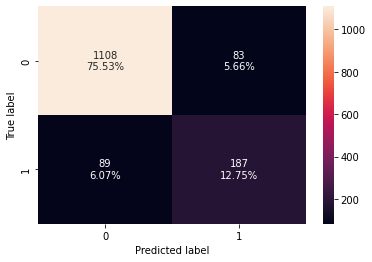

In [135]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [136]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [137]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.882754  0.677536   0.692593  0.684982


* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.

### Bagging Classifier

In [138]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

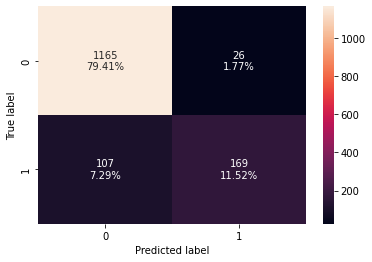

In [139]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [140]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.993861  0.968944     0.9984  0.983452


In [141]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.909339  0.612319   0.866667  0.717622


* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall.

**Bagging Classifier with weighted decision tree**

In [142]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

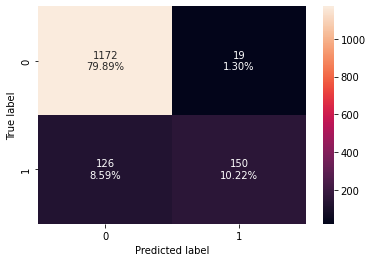

In [143]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [144]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.994738  0.973602   0.998408  0.985849


In [145]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.901159  0.543478   0.887574  0.674157


* Bagging classifier with a weighted decision tree is giving a fairly good accuracy and prediction but is not able to generalize well on test data in terms of recall.

### Random Forest

In [146]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

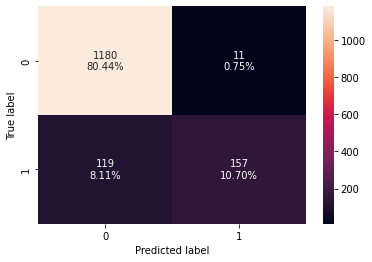

In [147]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [148]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [149]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.911384  0.568841   0.934524  0.707207


* Random Forest has performed well in terms of accuracy and precision, but it is not able to generalize well on the test data in terms of recall. There is overfitting in the data

**Random forest with class weights**

In [150]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

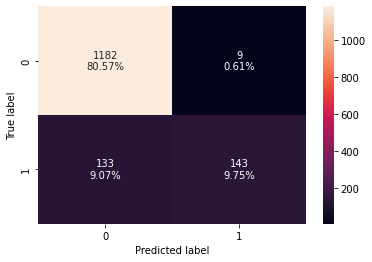

In [151]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [152]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [153]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.903204  0.518116   0.940789  0.668224


* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

### Tuning Models

### Using GridSearch for Hyperparameter tuning model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

**Tuning Decision Tree**

In [154]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15, None],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0.0001,
                       random_state=1)

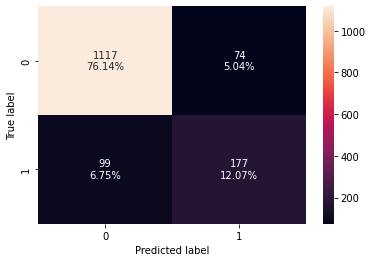

In [155]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [156]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.993569  0.965839        1.0  0.982622


In [157]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.882072  0.641304   0.705179  0.671727


* Overfitting in decision tree has reduced but the recall has also reduced immensly.

**Tuning Bagging Classifier**

In [158]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [159]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.9, n_estimators=101, random_state=1)

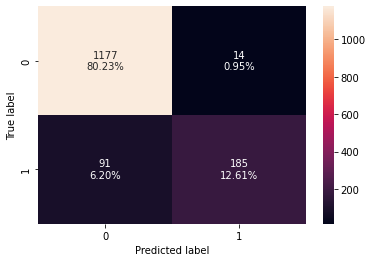

In [160]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [161]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [162]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.928425  0.67029   0.929648  0.778947


* Recall has improved but the accuracy and precision of the model has dropped drastically which is an indication that overall the model is making many mistakes.

**Tuning Random Forest**

In [163]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.9, n_estimators=251, random_state=1)

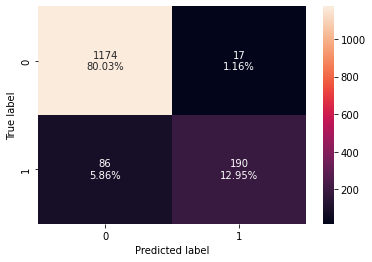

In [164]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [165]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [166]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.929789  0.688406   0.917874  0.786749


* Random forest after tuning has given same performance as un-tuned random forest.

### Comparing all the models

In [167]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,
    rf_wt_model_train_perf.T,dtree_estimator_model_train_perf.T, bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,1.0,0.993861,0.994738,1.0,1.0,0.993569,1.0,1.0
Recall,1.0,0.968944,0.973602,1.0,1.0,0.965839,1.0,1.0
Precision,1.0,0.998400,0.998408,1.0,1.0,1.000000,1.0,1.0
F1,1.0,0.983452,0.985849,1.0,1.0,0.982622,1.0,1.0


In [168]:
# training performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T,dtree_estimator_model_test_perf.T, bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,0.882754,0.909339,0.901159,0.911384,0.903204,0.882072,0.928425,0.929789
Recall,0.677536,0.612319,0.543478,0.568841,0.518116,0.641304,0.670290,0.688406
Precision,0.692593,0.866667,0.887574,0.934524,0.940789,0.705179,0.929648,0.917874
F1,0.684982,0.717622,0.674157,0.707207,0.668224,0.671727,0.778947,0.786749


* Decision tree performed well on training and test set.
* Bagging classifier performed better than Decision Tree. 
* Random Forest with default parameters performed lower  after tuning - As the final results depend on the parameters used/checked using GridSearchCV, There may be yet better parameters which may result in a better performance.

# **Model Building Boosting**

In [169]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

### AdaBoost Regressor

In [170]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [171]:
ab_regressor_score=get_model_score(ab_regressor)

R-sqaure on training set :  0.1530620840115442
R-square on test set :  0.18754196931652367
RMSE on training set :  0.35975230675205505
RMSE on test set :  0.35227415012572016


- AdaBoost is generalizing well but it is giving poor performance, in terms of r2 score as well as RMSE, as compared to decision tree and random forest model.  

### Hyperparameter Tuning

In [172]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=20, random_state=1)

In [173]:
ab_tuned_score=get_model_score(ab_tuned)

R-sqaure on training set :  0.1848427604897589
R-square on test set :  0.20714648787074996
RMSE on training set :  0.35293806013312806
RMSE on test set :  0.3479980297336148


- There is no significant improvement in the model after hyperparameter tuning.

In [174]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Passport                       0.313431
Age                            0.112868
ProductPitched                 0.110406
CityTier                       0.102270
Designation_Executive          0.092279
MaritalStatus_Single           0.082708
PreferredPropertyStar          0.030304
MonthlyIncome                  0.029244
DurationOfPitch                0.026180
NumberOfFollowups              0.021962
NumberOfTrips                  0.021274
MaritalStatus_Divorced         0.017079
PitchSatisfactionScore         0.010908
MaritalStatus_Married          0.007701
Occupation_Large Business      0.007539
MaritalStatus_Unmarried        0.006566
TypeofContact_Self Enquiry     0.004658
NumberOfPersonVisiting         0.002461
NumberOfChildrenVisiting       0.000162
Designation_Manager            0.000000
Designation_Senior Manager     0.000000
Designation_AVP                0.000000
Occupation_Salaried            0.000000
Gender_Male                    0.000000


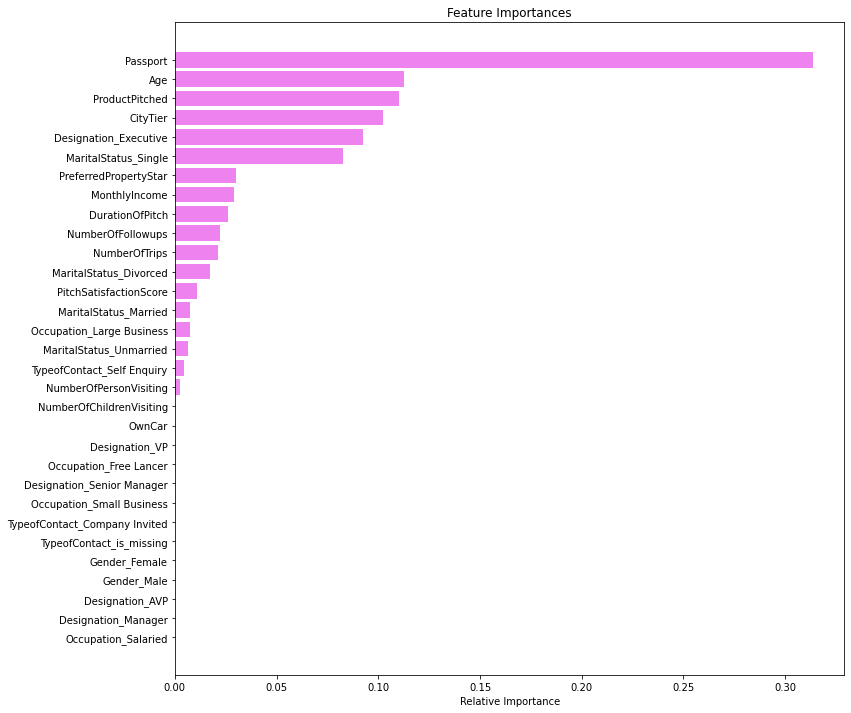

In [175]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Passport is the most important features here, followed by Age and ProductPitched.

### Gradient Boosting Regressor

In [176]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [177]:
gb_estimator_score=get_model_score(gb_estimator)

R-sqaure on training set :  0.4071629743287899
R-square on test set :  0.34739029619026807
RMSE on training set :  0.3009854205047583
RMSE on test set :  0.3157236184240531


- Gradient boosting is generalizing well and giving decent results but not as good as random forest.

### Hyperparameter Tuning

In [178]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=10, max_features=0.9, n_estimators=175,
                          random_state=1, subsample=0.7)

In [179]:
gb_tuned_score=get_model_score(gb_tuned)

R-sqaure on training set :  0.999891581514565
R-square on test set :  0.6599887479102793
RMSE on training set :  0.004070328561684061
RMSE on test set :  0.2278908838073776


- We can see that the model has improved significantly in terms of r2 score and RMSE.
- The r2 score has increase by approx 31% on the test data.
- RMSE has decreased by almost 9 for the test data.

In [180]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
MonthlyIncome                  1.461561e-01
DurationOfPitch                1.255903e-01
Age                            1.228411e-01
NumberOfTrips                  6.248455e-02
NumberOfFollowups              5.516134e-02
Passport                       5.377036e-02
PitchSatisfactionScore         5.134460e-02
CityTier                       4.296373e-02
ProductPitched                 3.847493e-02
PreferredPropertyStar          3.302044e-02
Designation_Executive          2.593899e-02
NumberOfChildrenVisiting       2.314246e-02
NumberOfPersonVisiting         2.237520e-02
MaritalStatus_Single           2.204653e-02
Occupation_Large Business      1.814339e-02
OwnCar                         1.613588e-02
TypeofContact_Company Invited  1.525151e-02
Occupation_Small Business      1.523239e-02
Gender_Female                  1.419498e-02
MaritalStatus_Divorced         1.339081e-02
MaritalStatus_Married          1.204454e-02
MaritalStatus_Unmarried        1

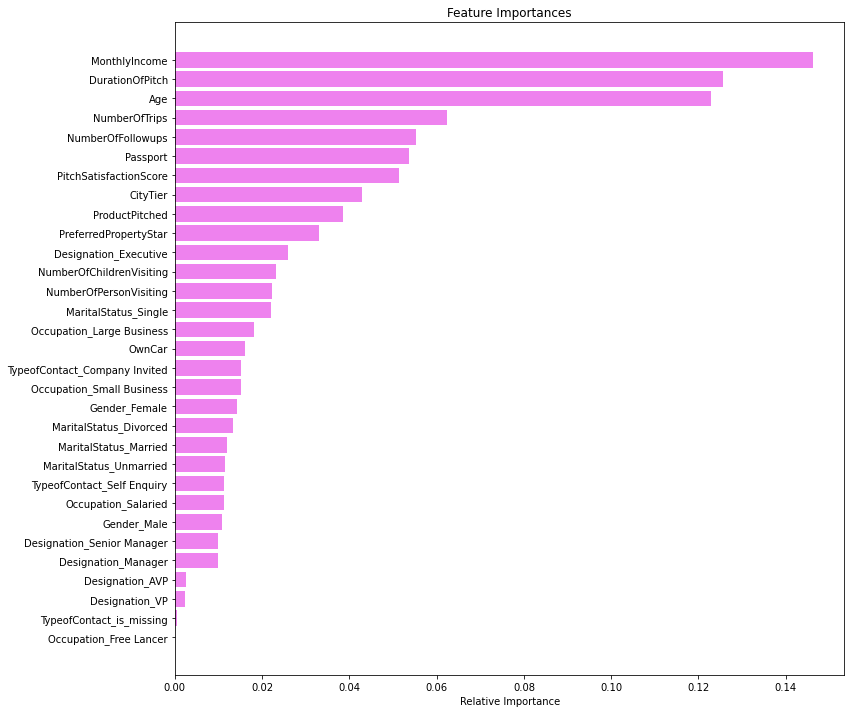

In [181]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Monthly Income is the most important feature, followed by Number of trips, number of follow ups and passport

## <a id = "link7"></a>Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction.**

In [ ]:
estimators=[('Decision Tree', dtree_tuned),('adbaoost', ab_tuned),
           ('XGradient Boosting', xgb_tuned)]
final_estimator=GradientBoostingRegressor(random_state=1)

In [ ]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=14,
                                                     min_impurity_decrease=0.1,
                                                     min_samples_leaf=5,
                                                     random_state=1)),
                              ('adbaoost',
                               AdaBoostRegressor(learning_rate=1,
                                                 n_estimators=30,
                                                 random_state=1)),
                              ('XGradient Boosting',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=0.8,
                                            colsample_bynode=1,
                                            colsample_bytree...
                                            learning_rate=0.300000012

In [ ]:
stacking_estimator_score=get_model_score(stacking_estimator)

R-sqaure on training set :  0.981081156952059
R-square on test set :  0.9528727486722692
RMSE on training set :  24.711926633484044
RMSE on test set :  40.22389965102671


## Business Insights and Recommendations

* I have been able to build a predictive model:
  a) that company can deploy  to identify key variables among the clients when marketing their packages to clients .
  b) based on which company can take appropriate follow-ups to build increase its revenue in the future 

* Factors that inform the pacakge choice - Passport, Monthly Income, Number of trips, Age and Number of follow-ups.
* Monthly Income: Clients with higher income are mosre likely to take up the packages, as this means they have more disposable income to access and seek to go for tours more

* Passport: Those clients with passport are more likely to take thepackages. This basically means, if one has a passport, there is willingness and more room to travel compared to those without a passport.  

* Age: Age of a customers tend to play a role in decision to travel, most of the travelers are aged 37yrs and below, showing that the younger generation tend to want to travel more than the older generation. 

* Number of trips made; Clients who have traveled more than, tend to take up packages, this could mean that there is exposure and thus the desire to travel. 

* Number of follow ups: The more follow-ups are made on clients, the more likely they are to travel. 

* Among the products pitched, most of the clients prefered the basic package followed closely by the deluxe package and then the Standard package. 

* While pitching to the Male, they are more likely to choose the kingsize package, while the Female counterparts are more liely to choose the Super deluxe package

* Most clients from City Tier 1 took the Basic package, followed by those that chose the King package. Among the Tier 2 city clients, most chose the King package, while the Tier 3 city clients chose the Deluxe package followed closely by thse that chose Standard and Super deluxe

* Most of the self inquiry clients chose the King package, while among those that the company invited took the Deluxe package. 